# HW-02：Stata 基础命令练习

- 姓名：宁确
- 学号：22361064
- 内容介绍：描述妇女工资分布 → 可视化行业/种族差异 → 估计黑人工时回报弹性差异
- 说明：本人在完成作业过程中使用了Copilot、Kimi等AI工具，关键提示词参见[Kimi对话过程1](https://www.kimi.com/chat/d3fogaq783mh47f6rc30)、[Kimi对话过程2](https://www.kimi.com/chat/d3fq3460ftlgud0p7d0g)、[Kimi对话过程3](https://www.kimi.com/chat/d3fqgfep4uo614j51khg)

# 描述性统计并输出为word

In [118]:
// 导入stata文件
sysuse nlsw88.dta, clear

// 输出平均值、标准差、中位数、最小值和最大值
summarize age grade wage hours ttl_exp tenure

// 输出word文档
sum2docx age grade wage hours ttl_exp tenure using Table01.docx, ///
        replace stats(N mean(%9.2f) sd(%9.2f) min(%9.2f) ///
        median(%9.2f) max(%9.2f))  ///
        title("Table 1: Descriptive Statistics")

(NLSW, 1988 extract)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |      2,246    39.15316    3.060002         34         46
       grade |      2,244    13.09893    2.521246          0         18
        wage |      2,246    7.766949    5.755523   1.004952   40.74659
       hours |      2,242    37.21811    10.50914          1         80
     ttl_exp |      2,246    12.53498    4.610208   .1153846   28.88461
-------------+---------------------------------------------------------
      tenure |      2,231     5.97785    5.510331          0   25.91667
Summary statistics table has been written to file Table01.docx.


## 产生新变量

In [119]:
// 生成age的平方项
gen age2 = age^2

// 生成wage的自然对数
gen ln_wage = ln(wage)

// 生成wage与hours的比值
gen wage_hour = wage/hours

// 生成妇女工资是否大于所有妇女平均工资的虚拟变量
gen dum = wage > r(mean)

(4 missing values generated)


## 绘图

(bin=33, start=.11538462, width=.87179486)
file His_ttl.png written in PNG format


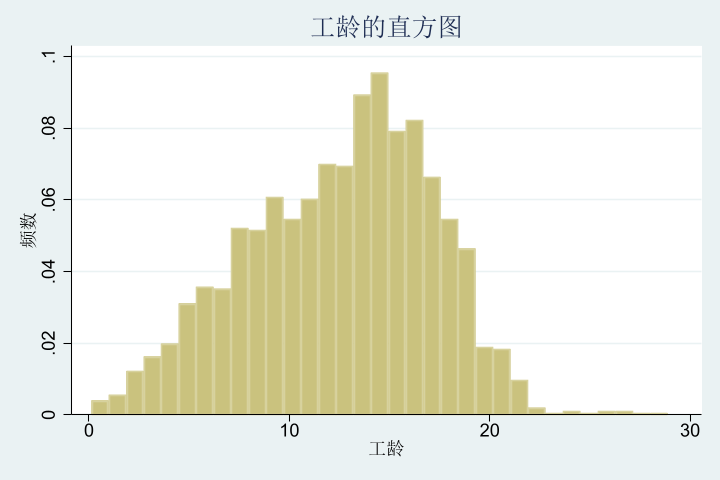

In [120]:
// 绘制ttl_exp的直方图并输出
histogram ttl_exp, title("工龄的直方图") xtitle("工龄") ytitle("频数")
graph export His_ttl.png, replace

file Kendi_ttl.png written in PNG format


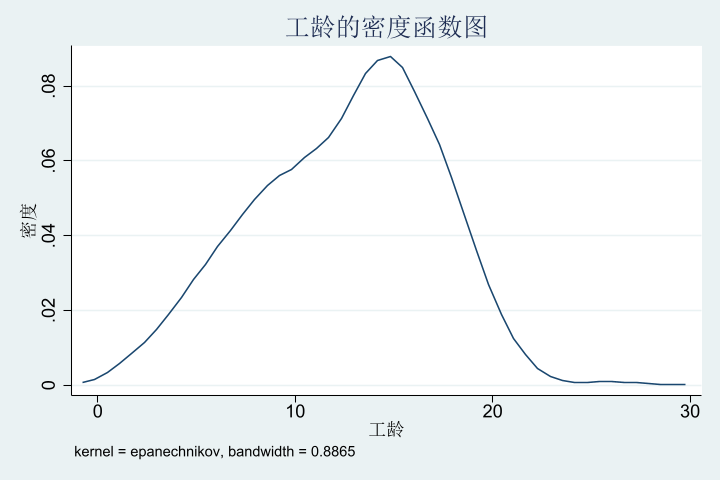

In [121]:
// 绘制ttl_exp的密度函数图并输出
kdensity ttl_exp, title("工龄的密度函数图") xtitle("工龄") ytitle("密度")
graph export Kendi_ttl.png, replace

## 分行业统计

In [122]:
// 统计各行业观测值个数
tabulate ind


               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        0.76        0.76
                 Mining |          4        0.18        0.94
           Construction |         29        1.30        2.24
          Manufacturing |        367       16.44       18.68
 Transport/Comm/Utility |         90        4.03       22.72
 Wholesale/Retail trade |        333       14.92       37.63
Finance/Ins/Real estate |        192        8.60       46.24
    Business/Repair svc |         86        3.85       50.09
      Personal services |         97        4.35       54.44
  Entertainment/Rec svc |         17        0.76       55.20
  Professional services |        824       36.92       92.11
  Public administration |        176        7.89      100.00
------------------------+-----------------------------------
                  Total |      2,232      100.00


In [123]:
// 统计各行业妇女的平均工资、平均工作时数、平均年龄
tabstat wage hours age, by(industry) stat(mean) format(%9.2f)


Summary statistics: Mean
Group variable: industry (Industry)

        industry |      wage     hours       age
-----------------+------------------------------
Ag/Forestry/Fish |      5.62     34.47     39.94
          Mining |     15.35     40.00     37.25
    Construction |      7.56     35.66     38.62
   Manufacturing |      7.50     40.89     38.99
Transport/Comm/U |     11.44     39.86     39.28
Wholesale/Retail |      6.13     35.25     39.29
Finance/Ins/Real |      9.84     38.52     38.83
Business/Repair  |      7.52     33.15     38.73
Personal service |      4.40     32.09     39.24
Entertainment/Re |      6.72     34.35     40.12
Professional ser |      7.87     36.72     39.24
Public administr |      9.15     38.55     39.16
-----------------+------------------------------
           Total |      7.78     37.23     39.15
------------------------------------------------


In [124]:
// 统计各行业白种人、黑种人和其他人种的比例
tabulate race


       Race |      Freq.     Percent        Cum.
------------+-----------------------------------
      White |      1,637       72.89       72.89
      Black |        583       25.96       98.84
      Other |         26        1.16      100.00
------------+-----------------------------------
      Total |      2,246      100.00


## 为 race 定义值标签

In [125]:
// 定义值标签
label define racelb 1 "白种人" 2 "黑种人" 3 "其它"

// 把值标签挂到race变量
label value race racelbl

## 连续变量转类别变量

In [126]:
// 生成新变量 G_age
gen G_age = age <= 37
replace  G_age = 2 if age > 37 & age <= 42
replace  G_age = 3 if age > 42

// 添加值标签
label define G_agelbl              ///
    1 "37岁以下"                ///
    2 "38到42岁之间"            ///
    3 "43岁以上"

label value G_age G_agelb

(1,043 real changes made)
(408 real changes made)


## 工资分布

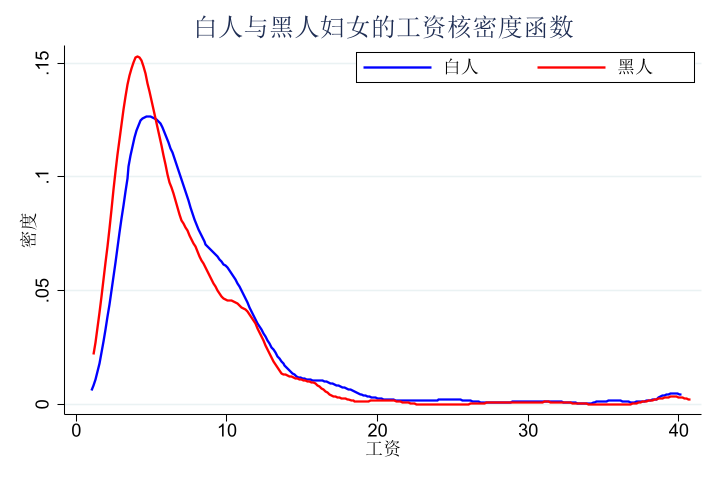

In [127]:
// 绘制白人和黑人妇女的工资核密度函数图
twoway ///
    (kdensity wage if race==1, lcolor(blue) lwidth(medthick)) ///
    (kdensity wage if race==2, lcolor(red)  lwidth(medthick)) ///
    , ///
    title("白人与黑人妇女的工资核密度函数") ///
    xtitle("工资") ytitle("密度") ///
    legend(order(1 "白人" 2 "黑人") pos(1) ring(0)) ///
    graphregion(color(white))

- 黑人妇女工资分布左偏且更集中，白人妇女人整体工资更高

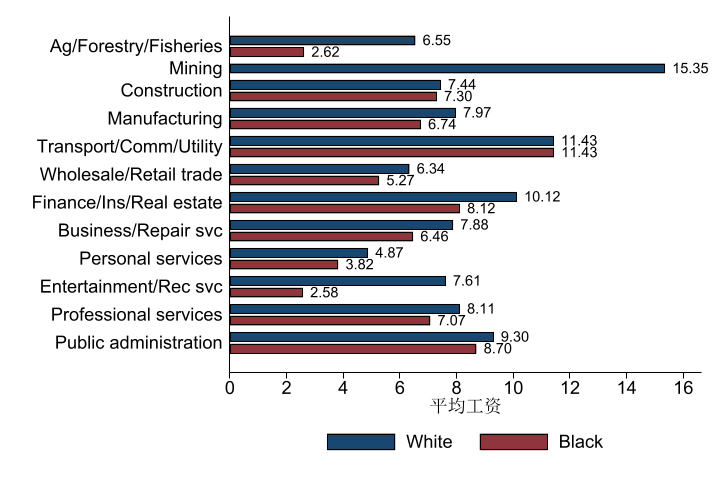

In [128]:
// 绘制白人和黑人妇女的工资分行业柱状图
global graph_opts1 ///
  bgcolor(white) ///
  graphregion(color(white)) ///
  legend(region(lc(none) fc(none))) ///
  ylabel(, angle(0) nogrid) ///  
  title(, justification(left) color(black) span position(11)) ///
  subtitle(, justification(left) color(black))

graph hbar wage if inlist(race,1,2), ///
  over(race) asyvars                 ///
  bargap(20)                         ///
  over(industry)                     ///
  nofill                             ///
  blabel(bar, format(%9.2f))         ///
  ${graph_opts1}                     ///
  bar(1 , lcolor(black) lwidth(thin) fintensity(100)) ///
  bar(2 , lcolor(black) lwidth(thin) fintensity(100)) ///
  legend(rows(1) order(1 "White" 2 "Black")) ///
  ytitle("平均工资")      /// 
  ylabel(0(2)16)                     ///
  name(hbar_race_wage, replace)

## 基本回归分析

In [129]:

// 把行业编码最小的组当基准
fvset base 1 industry

// 回归：仅截距+行业哑变量
regress wage i.industry


      Source |       SS           df       MS      Number of obs   =     2,232
-------------+----------------------------------   F(11, 2220)     =     13.80
       Model |  4743.21081        11  431.200983   Prob > F        =    0.0000
    Residual |   69374.068     2,220  31.2495802   R-squared       =    0.0640
-------------+----------------------------------   Adj R-squared   =    0.0594
       Total |  74117.2788     2,231  33.2215503   Root MSE        =    5.5901

------------------------------------------------------------------------------
        wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    industry |
     Mining  |   9.728472   3.106542     3.13   0.002     3.636439     15.8205
Construct~n  |   1.943813   1.707566     1.14   0.255    -1.404781    5.292407
Manufactu~g  |   1.880457   1.386852     1.36   0.175    -.8392066     4.60012
Transport~y  |   5.822232   1.47831


Adjusted predictions                                     Number of obs = 2,232
Model VCE: OLS

Expression: Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    industry |
Ag/Forest~s  |   5.621121   1.355806     4.15   0.000      2.96234    8.279902
     Mining  |   15.34959   2.795066     5.49   0.000     9.868375    20.83081
Construct~n  |   7.564934   1.038062     7.29   0.000     5.529261    9.600607
Manufactu~g  |   7.501578   .2918025    25.71   0.000     6.929343    8.073812
Transport~y  |   11.44335   .5892517    19.42   0.000     10.28781    12.59889
Wholesale..  |   6.125897   .3063374    20.00   0.000     5.525159    6.726634
Finance/I..  |   9.843174   .4034331    24.40   0.000     9.052028    10.63432
Business/..  |    

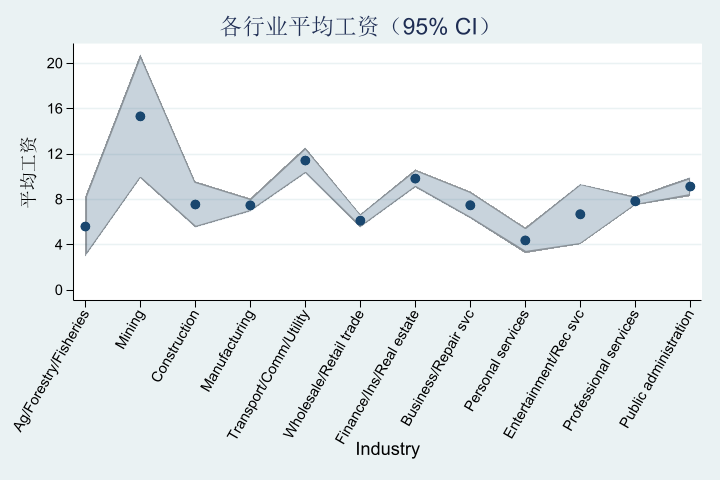

In [136]:
// 计算各行业预测均值
margins industry

// 画图：带置信区间
marginsplot, ///
  recast(scatter) /// 点估计
  recastci(rarea) /// CI 用阴影
  ciopts(color(%30) lcolor(black)) /// CI 颜色
  xlabel(, angle(60) labsize(small)) /// 行业标签旋转
  ylabel(0(4)20, angle(0) labsize(small)) ///
  ytitle("平均工资") ///
  title("各行业平均工资（95% CI）") ///
  name(margins_industry, replace)

In [137]:
// 生成新变量
gen ln_hours = ln(hours)
gen Black = race == 2
gen Black_ln_hours = Black * ln_hours

(4 missing values generated)
(4 missing values generated)


In [ ]:
// reg回归
regress ln_wage ln_hours Black Black_ln_hours age age2 i.race ttl_exp ///
        i.industry i.occupation, vce(cluster industry)

note: 2.race omitted because of collinearity.

Linear regression                               Number of obs     =      2,224
                                                F(10, 11)         =          .
                                                Prob > F          =          .
                                                R-squared         =     0.3544
                                                Root MSE          =     .46387

                              (Std. err. adjusted for 12 clusters in industry)
------------------------------------------------------------------------------
             |               Robust
     ln_wage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0374525   .0272505     1.37   0.197    -.0225255    .0974305
       Black |  -.4040401   .3483887    -1.16   0.271    -1.170839    .3627583
Black_ln_h~s |    .090179   .0941375     0.96  

- beta1：对非黑人妇女，工作时间每增加1%，工资平均上涨0.037%
- beta3：工作时间每增加1%，黑人妇女工资相比非黑人妇女额外上涨0.090%

In [142]:
// areg回归
egen doubleD = group(industry occupation)
areg ln_wage ln_hours Black Black_ln_hours age age2 i.race ttl_exp, ///
     absorb(doubleD) vce(cluster industry)

(18 missing values generated)
note: 2.race omitted because of collinearity.

Linear regression, absorbing indicators             Number of obs     =  2,224
Absorbed variable: doubleD                          No. of categories =     87
                                                    F(7, 11)          =  64.52
                                                    Prob > F          = 0.0000
                                                    R-squared         = 0.3837
                                                    Adj R-squared     = 0.3568
                                                    Root MSE          = 0.4599

                              (Std. err. adjusted for 12 clusters in industry)
------------------------------------------------------------------------------
             |               Robust
     ln_wage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   

- beta1：对非黑人妇女，工作时间每增加1%，工资平均上涨0.041%
- beta3：工作时间每增加1%，黑人妇女工资相比非黑人妇女额外上涨0.097%

In [143]:
// reghdfe回归
reghdfe ln_wage ln_hours Black Black_ln_hours age age2 i.race ttl_exp, ///
        absorb(industry occupation) vce(cluster industry)

(dropped 1 singleton observations)
(MWFE estimator converged in 9 iterations)
note: 1b.race omitted because of collinearity

HDFE Linear regression                            Number of obs   =      2,223
Absorbing 2 HDFE groups                           F(   7,     11) =      69.73
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.3544
                                                  Adj R-squared   =     0.3458
                                                  Within R-sq.    =     0.0781
Number of clusters (industry) =         12        Root MSE        =     0.4639

                              (Std. err. adjusted for 12 clusters in industry)
------------------------------------------------------------------------------
             |               Robust
     ln_wage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------

- beta1：对非黑人妇女，工作时间每增加1%，工资平均上涨0.037%
- beta3：工作时间每增加1%，黑人妇女工资相比非黑人妇女额外上涨0.090%